# CONFUSION MATRIX

Confusion matrix adalah sebuah tabel untuk melihat performansi dari sebuah model. Tabel tersebut mempunyai ukuran 2x2, dan mempunyai nilai yaitu True Positive(TP), False Positive(FP), True Negative(TN), False Negative(FN)

True Positive nilai saat nilai prediksi dan nilai yang diobservasi untuk class 1 sesuai
<br>True Negative adalah nilai saat nilai prediksi dan nilai yang diobservasi untuk class 0 sesuai
<br>False Positive adalah nilai model saat memprediksi 1 tetapi  nilai yang diobservasi adalah 0
<br> False Negative adalah nilai model saat memprediksi 0 tetapat nilai yang diobservasi adalah 1


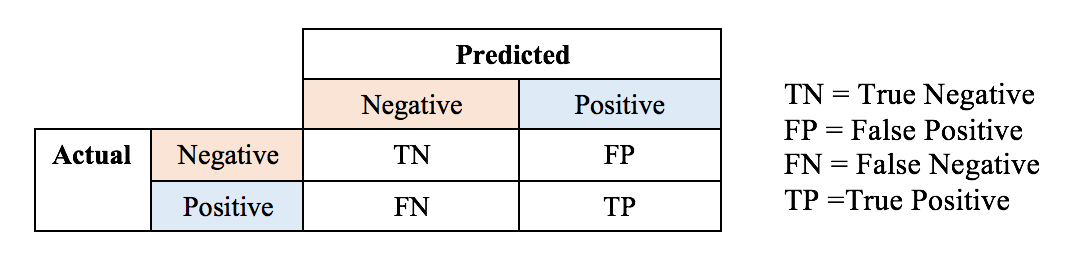

Accuracy:
<br>digunakan untuk mengukur akurasi secara keseluruhan sebuah model.
<br>Precision:
<br>pengukuran terhadap 1 kelas/kategori. Saat model memprediksi dengan benar, seberapa tepat prediksi model tersebut.
<br>Sensitivity/Recall:
<br>pengukuran terhadap 1 observasi. Dari total data dalam 1 kategori yang diobservasi, seberapa sering model memprediksi dengan benar.(True Positive Rate)
<br>Specificity:
<br>pengukuran terhadap 1 observasi. Dari total data dalam 1 kategori yang diobservasi, seberapa sering model memprediksi dengan benar.(True Negative Rate)

Error rate = 1 - Accuracy



Adapun dari nilai-nilai tersebut dapat dilakukan pengukuran performansi dengan rumus sebagai berikut

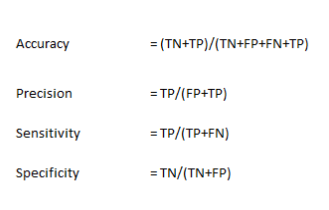

# CODING SECTION


Misalkan kita sudah selesai membuat model machine learning dalam dataset Fraud Detection. Kemudian kita ambil kolom prediksi dan kolom observasi untuk dianalisis lebih lanjut

In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv('cm_test.csv')

In [4]:
df.head(10)

,y_test,y_pred
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,1


kemudian kita buat confusion matrix berdasarkan data tersebut

In [5]:
#mengubah dataframe menjadi array
test = df.y_test.values
pred = df.y_pred.values

In [8]:
#implementasi confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test, pred)

In [24]:
cm

array([[2300,  142],
       [   9,  170]], dtype=int64)

# Visualisasi

In [12]:

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

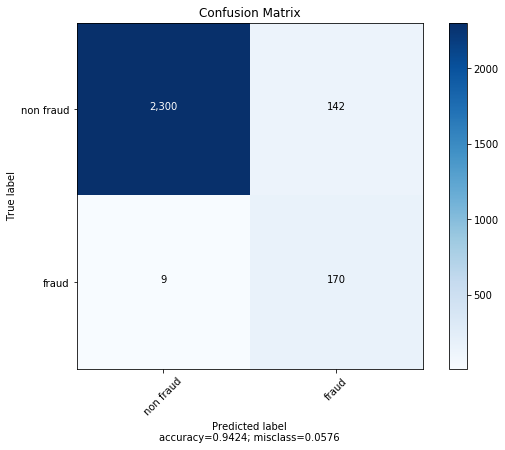

In [19]:
plot_confusion_matrix(cm           = np.array([[ tn,  fp],
                                              [  fn,  tp]]), 
                                              
                      normalize    = False,
                      target_names = ['non fraud', 'fraud',],
                      title        = "Confusion Matrix")

Dari kasus diatas.. nilai elemen-elemen pada confusion matrix bisa diinterpretasikan sebagai berikut

TP = 170, Jumlah label fraud dari observasi yang berhasil diprediksi oleh model dengan tepat.
<br>TN = 2300, Jumlah label non fraud dari observasi yang berhasil diprediksi oleh model dengan tepat.
<br>FN = 9, Jumlah label fraud dari observasi yang salah diprediksi oleh model.
<br>FP = 142, Jumlah label non fraud dari observasi yang salah diprediksi oleh model.

# Perhitungan turunan dari confusion matrix

In [1]:
accuracy = (tn+tp)/(tn+fp+fn+tp)
precision = tp/(fp+tp)
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)


NameError: name 'tn' is not defined

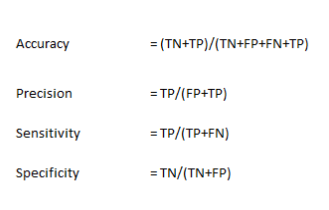

In [23]:
print('Accuracy = {}'.format(accuracy))
print('Precision = {}'.format(precision))
print('Sensitivity = {}'.format(sensitivity))
print('Specificity = {}'.format(specificity))


Accuracy = 0.9423884013735215
Precision = 0.5448717948717948
Sensitivity = 0.9497206703910615
Specificity = 0.9418509418509419


# KESIMPULAN

Dalam membuat mengukur kualitas sebuah model machine learning, baiknya untuk tidak hanya memperhatikan akurasi, tapi presisi, sensitivity, dan specificity. Confusion matrix adalah hal yang wajib untuk dikuasai data scientist untuk mengevaluasi sebuah model.

Untuk memberikan insight kepada orang yang awam terhadap data science, diperlukan adanya visualisasi yang lebih jelas dalam memberikan gambaran kualitas sebuah model. Visualisasi tersebut menggunakan ROC-AUC, yang grafiknya merupakan aplikasi dari perhitungan confusion matrix.